In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
carros_treino = pd.read_csv("/content/cars_train.csv", encoding="ISO-8859-1", sep = ";", thousands=' ')

In [3]:
carros_teste = pd.read_csv("/content/cars_test.csv", encoding="ISO-8859-1", sep = ";", thousands=' ')

In [4]:
carros_treino.head()

,ï»¿id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_Ãºnico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fÃ¡brica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539000000000000000000000000,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,False,NaN,NaN,Todas as revisÃµes feitas pela concessionÃ¡ria,IPVA pago,Licenciado,NaN,NaN,NaN,7473259008373930
1,279639842134129000000000000000000000000,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÃTICO,2017,2017,62979,AutomÃ¡tica,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,8196533263377470
2,56414460810621000000000000000000000000,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÃTICO,2018,2019,44070,AutomÃ¡tica,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16282481447192
3,56862509826849900000000000000000000000,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,AutomÃ¡tica,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,12368135885695500
4,338980975753200000000000000000000000000,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÃTICO,2013,2015,71491,AutomÃ¡tica,4,...,False,NaN,NaN,Todas as revisÃµes feitas pela concessionÃ¡ria,NaN,NaN,Garantia de fÃ¡brica,Todas as revisÃµes feitas pela agenda do carro,NaN,824197638908304


In [5]:
carros_treino.shape

(29584, 29)

In [6]:
carros_treino.drop(["ï»¿id", "veiculo_alienado"], axis=1, inplace=True)
carros_teste.drop(["ï»¿id", "veiculo_alienado"], axis=1, inplace=True)

In [7]:
carros_treino.shape

(29584, 27)

In [8]:
carros_treino.shape

(29584, 27)

In [9]:
carros_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29407 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  int64  
 6   hodometro                29584 non-null  int64  
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_vendedor          29584 non-null  object 
 14  estado_vendedor       

In [10]:
#renomeando as colunas que contém erros gramaticais
carros_treino.rename(columns={'ï»¿id': 'id', 'garantia_de_fÃ¡brica': 'garantia_de_fabrica', 'veiculo_Ãºnico_dono' : 'veiculo_unico_dono'}, inplace = True)
carros_treino.rename(columns={'ï»¿id': 'id', 'garantia_de_fÃ¡brica': 'garantia_de_fabrica', 'veiculo_Ãºnico_dono' : 'veiculo_unico_dono'}, inplace = True)

In [11]:
carros_treino['num_fotos'].agg(['median', 'mean'])
carros_teste['num_fotos'].agg(['median', 'mean'])

median     8.000000
mean      10.323811
Name: num_fotos, dtype: float64

In [12]:
carros_treino['num_fotos'].mode()
carros_teste['num_fotos'].mode()

0    8.0
Name: num_fotos, dtype: float64

In [13]:
# substituir valores nulos pela mediana
carros_treino['num_fotos'] = carros_treino['num_fotos'].fillna(carros_treino['num_fotos'].median())
carros_teste['num_fotos'] = carros_treino['num_fotos'].fillna(carros_treino['num_fotos'].median())

Tratamendo de dados nulos: Atributo categórico

In [14]:
carros_treino['veiculo_licenciado'] = carros_treino['veiculo_licenciado'].fillna('Não Informado')
carros_treino['ipva_pago'] = carros_treino['ipva_pago'].fillna('Não Informado')
carros_treino['dono_aceita_troca'] = carros_treino['dono_aceita_troca'].fillna('Não Informado')
carros_treino['veiculo_unico_dono'] = carros_treino['veiculo_unico_dono'].fillna('Não Informado')
carros_treino['revisoes_concessionaria'] = carros_treino['revisoes_concessionaria'].fillna('Não Informado')
carros_treino['revisoes_dentro_agenda'] = carros_treino['revisoes_dentro_agenda'].fillna('Não Informado')
carros_treino['garantia_de_fabrica'] = carros_treino['garantia_de_fabrica'].fillna('Não Informado')

In [15]:
carros_teste['veiculo_licenciado'] = carros_teste['veiculo_licenciado'].fillna('Não Informado')
carros_teste['ipva_pago'] = carros_teste['ipva_pago'].fillna('Não Informado')
carros_teste['dono_aceita_troca'] = carros_teste['dono_aceita_troca'].fillna('Não Informado')
carros_treino['veiculo_unico_dono'] = carros_treino['veiculo_unico_dono'].fillna('Não Informado')
carros_teste['revisoes_concessionaria'] = carros_teste['revisoes_concessionaria'].fillna('Não Informado')
carros_teste['revisoes_dentro_agenda'] = carros_teste['revisoes_dentro_agenda'].fillna('Não Informado')
carros_treino['garantia_de_fabrica'] = carros_treino['garantia_de_fabrica'].fillna('Não Informado')

In [16]:
carros_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29584 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  int64  
 6   hodometro                29584 non-null  int64  
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_vendedor          29584 non-null  object 
 14  estado_vendedor       

In [17]:
carros_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 0 to 9861
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                9862 non-null   float64
 1   marca                    9862 non-null   object 
 2   modelo                   9862 non-null   object 
 3   versao                   9862 non-null   object 
 4   ano_de_fabricacao        9862 non-null   int64  
 5   ano_modelo               9862 non-null   int64  
 6   hodometro                9862 non-null   int64  
 7   cambio                   9862 non-null   object 
 8   num_portas               9862 non-null   int64  
 9   tipo                     9862 non-null   object 
 10  blindado                 9862 non-null   object 
 11  cor                      9862 non-null   object 
 12  tipo_vendedor            9862 non-null   object 
 13  cidade_vendedor          9862 non-null   object 
 14  estado_vendedor         

In [18]:
# Não há mais instâncias nulas
carros_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29584 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  int64  
 6   hodometro                29584 non-null  int64  
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_vendedor          29584 non-null  object 
 14  estado_vendedor       

In [19]:
# Tratando Variáveis booleanas:
carros_treino['entrega_delivery'] = carros_treino['entrega_delivery'].astype(int)
carros_treino['troca'] = carros_treino['troca'].astype(int)
carros_treino['elegivel_revisao'] = carros_treino['elegivel_revisao'].astype(int)
carros_treino['entrega_delivery'] = carros_treino['entrega_delivery'].astype(int)
carros_treino['troca'] = carros_treino['troca'].astype(int)
carros_treino['elegivel_revisao'] = carros_treino['elegivel_revisao'].astype(int)

In [20]:
# Categorical Data and Numerical Data
train_categorical_data = carros_treino.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = carros_treino.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = carros_teste.select_dtypes(exclude=['int64', 'float','int32'])
test_numerical_data  = carros_teste.select_dtypes(include=['int64', 'float','int32'])

In [21]:
train_categorical_data.head()

,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,dono_aceita_troca,veiculo_unico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fabrica,revisoes_dentro_agenda
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,CVT,SedÃ£,N,Branco,PF,Rio de Janeiro,SÃ£o Paulo (SP),Pessoa FÃ­sica,Não Informado,Não Informado,Todas as revisÃµes feitas pela concessionÃ¡ria,IPVA pago,Licenciado,Não Informado,Não Informado
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÃTICO,AutomÃ¡tica,SedÃ£,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa FÃ­sica,Aceita troca,Não Informado,Não Informado,IPVA pago,Não Informado,Não Informado,Não Informado
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÃTICO,AutomÃ¡tica,SedÃ£,N,Preto,PJ,Santos,SÃ£o Paulo (SP),Loja,Aceita troca,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,AutomÃ¡tica,Picape,N,Branco,PJ,Sorocaba,SÃ£o Paulo (SP),Loja,Aceita troca,Não Informado,Não Informado,IPVA pago,Licenciado,Não Informado,Não Informado
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÃTICO,AutomÃ¡tica,UtilitÃ¡rio esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa FÃ­sica,Não Informado,Não Informado,Todas as revisÃµes feitas pela concessionÃ¡ria,Não Informado,Não Informado,Garantia de fÃ¡brica,Todas as revisÃµes feitas pela agenda do carro


In [22]:
# Label Encode and Hot Encode for Categorical Columns
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [23]:
train_categorical_data.head()

,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,dono_aceita_troca,veiculo_unico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fabrica,revisoes_dentro_agenda
0,27,257,424,4,5,0,0,0,432,23,3,1,0,1,0,0,1,0
1,18,133,876,2,5,0,0,0,61,10,3,0,0,0,0,1,1,0
2,19,378,1402,2,5,0,4,1,468,23,2,0,0,0,1,1,1,0
3,38,63,1087,2,4,0,0,1,482,23,2,0,0,0,0,0,1,0
4,33,259,1076,2,6,0,4,0,432,18,3,1,0,1,1,1,0,1


In [24]:
# Concatenating both Catagorical Data and Numerical Data
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = carros_treino['preco']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)
X.head()

,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,...,revisoes_dentro_agenda,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,entrega_delivery,troca,elegivel_revisao,preco
0,27,257,424,4,5,0,0,0,432,23,...,0,8.0,2017,2017,67772,4,0,0,0,7473259008373930
1,18,133,876,2,5,0,0,0,61,10,...,0,8.0,2017,2017,62979,4,0,0,0,8196533263377470
2,19,378,1402,2,5,0,4,1,468,23,...,0,16.0,2018,2019,44070,4,1,0,0,16282481447192
3,38,63,1087,2,4,0,0,1,482,23,...,0,14.0,2013,2015,85357,4,1,1,0,12368135885695500
4,33,259,1076,2,6,0,4,0,432,18,...,1,8.0,2013,2015,71491,4,0,0,0,824197638908304


In [25]:
y.head()

0     7473259008373930
1     8196533263377470
2       16282481447192
3    12368135885695500
4      824197638908304
Name: preco, dtype: int64

In [26]:
# Calculating Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
# Separação dos dados de treino e teste para a MP
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [28]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (20708, 27)
The size of training output is (20708,)
The size of testing input is (8876, 27)
The size of testing output is (8876,)


In [29]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(1,10))
param_grid = dict(max_depth = depth)

In [30]:
# Lista o Grid de Parâmetro
param_grid

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [31]:
#Definido oobjetivo, e quebrando os dados para treino
X = carros_treino.drop(columns="preco")
y = carros_treino["preco"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (20708, 26)
X Test  :  (8876, 26)
Y Train :  (20708,)
Y Test  :  (8876,)


In [32]:
#crianddo as variaveis de regressao
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

In [ ]:
# fazendo loop de cada Regressao

li = [LR, DTR,RFR,KNR,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

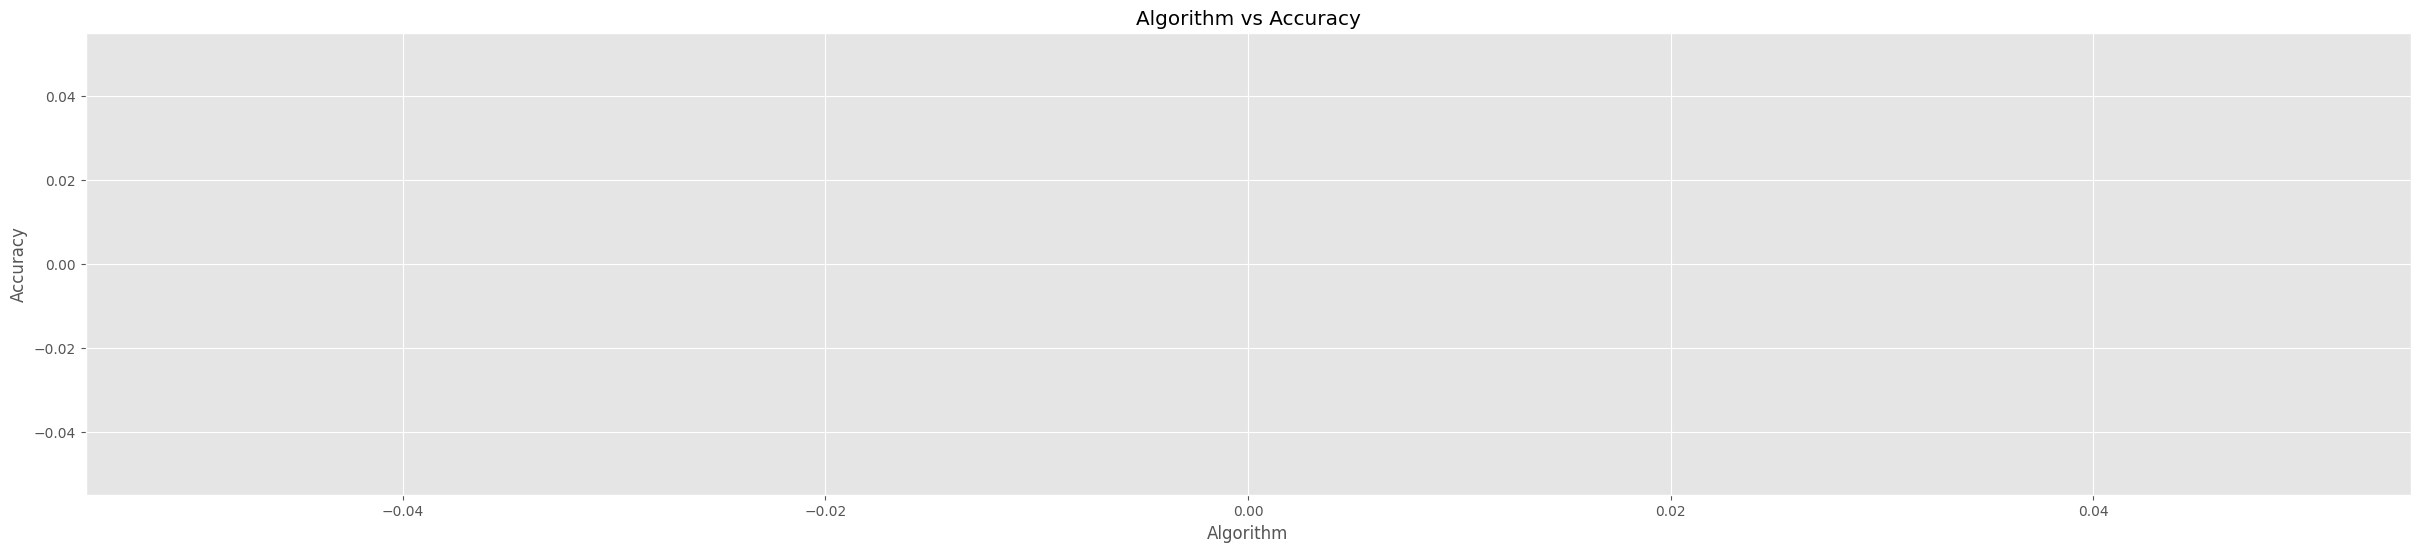

In [34]:
# gráfico de confiança de cada regressao

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='blue')
plt.show()

In [ ]:
# Salvar o resultado final do modelo
df_predicted.to_csv('../results/predicted.csv', index=False)